# Exercise Session 1: Getting Started with Computer Vision

The goals of this exercise are:
* getting started with Python for image manipulation
* getting familiar with the basic image manipulation functions
* implementing some simple real-world Computer Vision algorithms

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import measure, color
from os import listdir 

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

## Exercise 1: Image Segmentation

In many vision applications, it is useful to separate out the regions of the image corresponding to objects in which we are interested in the regions of the image that correspond to the background. Thresholding often provides an easy and convenient way to perform this segmentation on the basis of the different intensities or colours in the foreground and background regions of an image.

The input to a thresholding operation is typically a grayscale or colour image. In the simplest implementation, the output is a binary image representing the segmentation. Black pixels correspond to background and white pixels correspond to foreground (or vice versa). Multiple thresholds can be specified, so that a band of intensity values can be set to white while everything else is set to black.

If it is possible to separate out the foreground of an image on the basis of pixel intensity, then the intensity of pixels within foreground objects must be distinctly different from the intensity of pixels within the background. In this case, we expect to see a distinct peak in the histogram corresponding to foreground objects such that thresholds can be chosen to isolate this peak accordingly. If such a peak does not exist, then it is unlikely that simple thresholding will produce a good segmentation.

Below is an example of a thresholded image. The pixel values between Th1 and Th2 are set to 255 which represents white regions and the rest is set to 0 which represents black.
<br/>
 

<li>Read and display the image "wdg.png".</li>

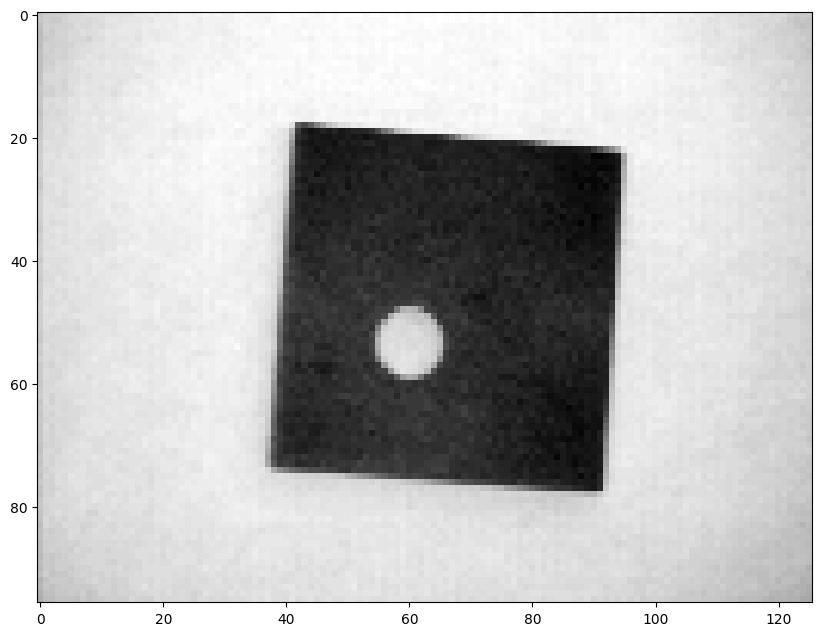

In [12]:
img_wdg = cv2.imread("images/wdg.png")
img_wdg = cv2.cvtColor(img_wdg, cv2.COLOR_BGR2GRAY)
plt.imshow(img_wdg)

<li> Write a method to threshold a gray scale image by using two threshold values as shown above. The values must satisfy the following conditions: <br/> Th1 < Th2, Th1 > 0, Th2 < max </li>

In [13]:
def threshold(t1, t2, img):
    th_img = img.copy()
    th_img[th_img<t1] = 0
    th_img[th_img>t2] = 0
    th_img[(th_img>=t1) & (th_img<=t2)] = 255
    return th_img

<li> Take a look at the histogram using function matplotlib.pyplot.hist and choose the best threshold values and segment the image.</li>

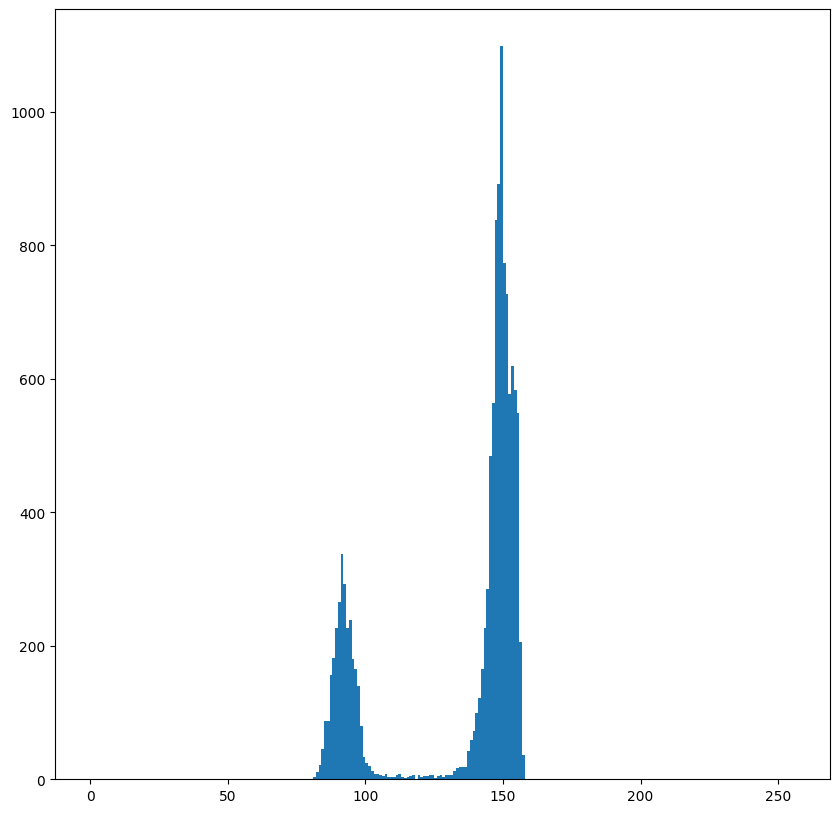

In [14]:
#Note: for visualizing the histogram of ALL pixels intensities you have to convert 2D image matrix into 1D array with ravel()
plt.hist(img_wdg.ravel(), 256,[0,256])
plt.show()

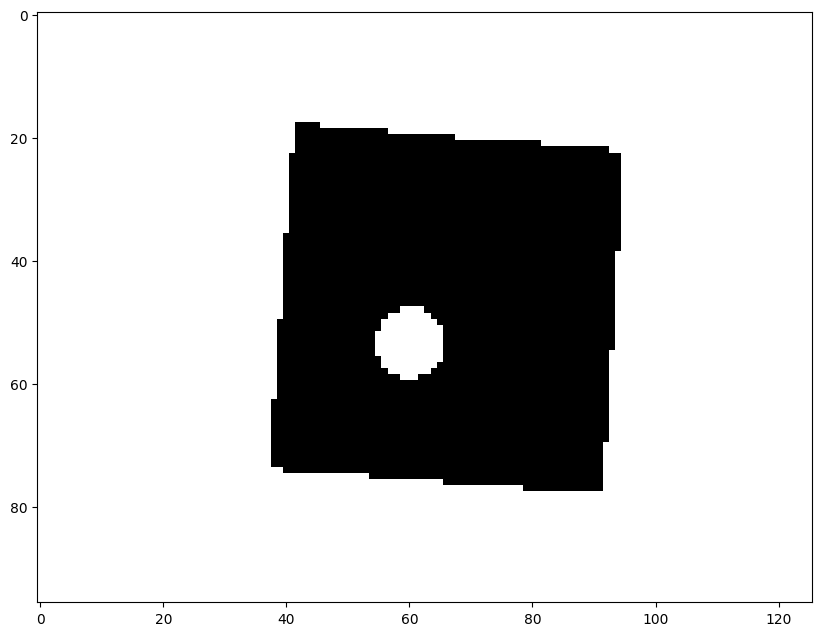

In [15]:
th_img_wdg = threshold(120, 180, img_wdg)
plt.imshow(th_img_wdg)
plt.show()

<li> Repeat the same steps for images "brain.png" and "shading.png". What do you notice? What are the drawbacks of this segmentation method? </li>

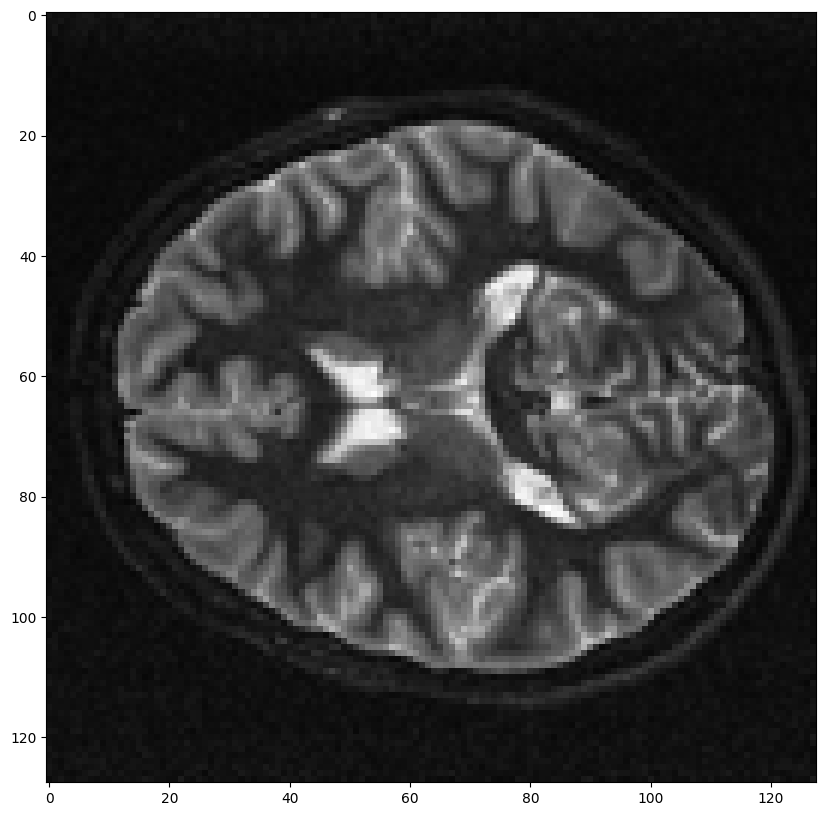

In [16]:
img_brain = cv2.imread("images/brain.png")
img_brain = cv2.cvtColor(img_brain, cv2.COLOR_BGR2GRAY)
plt.imshow(img_brain)

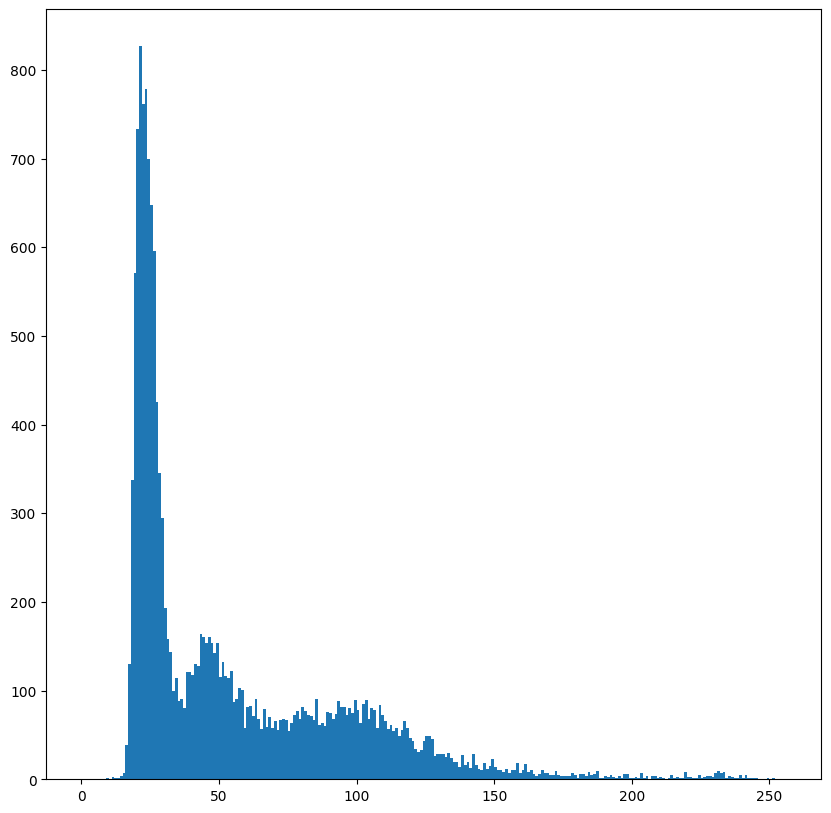

In [17]:
plt.hist(img_brain.ravel(), 256,[0,256])
plt.show()

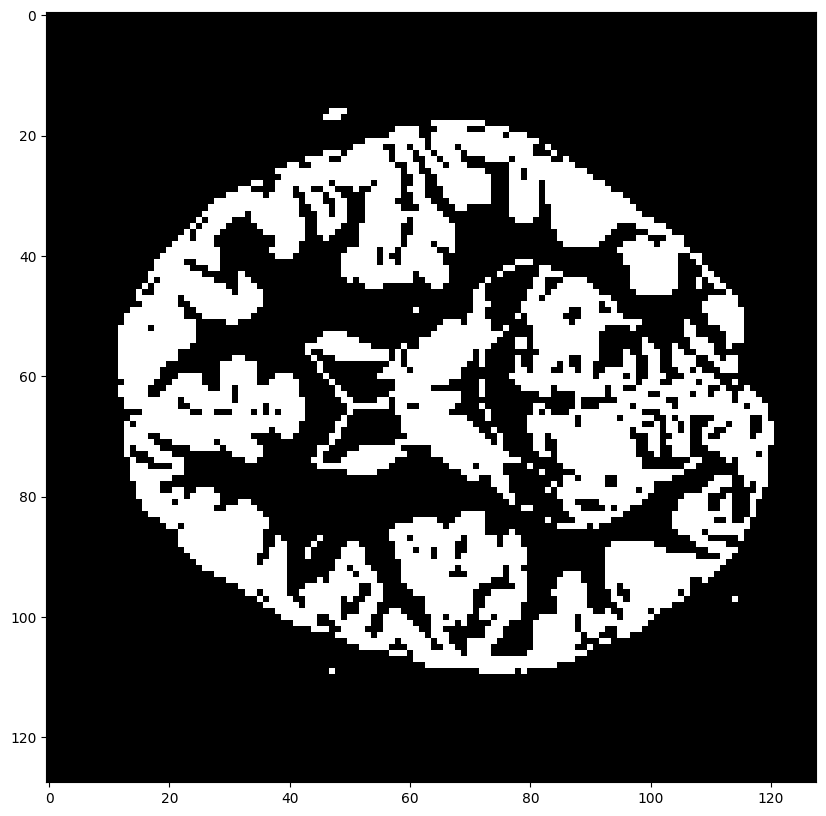

In [18]:
th_img_brain = threshold(70, 140, img_brain)
plt.imshow(th_img_brain)

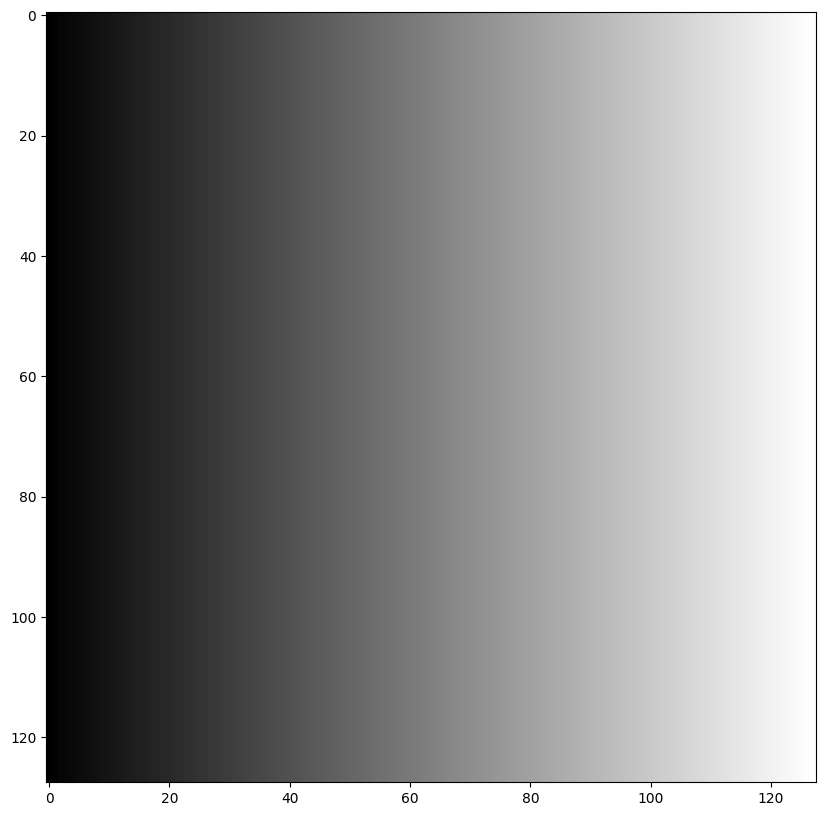

In [19]:
img_shading = cv2.imread("images/shading.png")
img_shading = cv2.cvtColor(img_shading, cv2.COLOR_BGR2GRAY)
plt.imshow(img_shading)

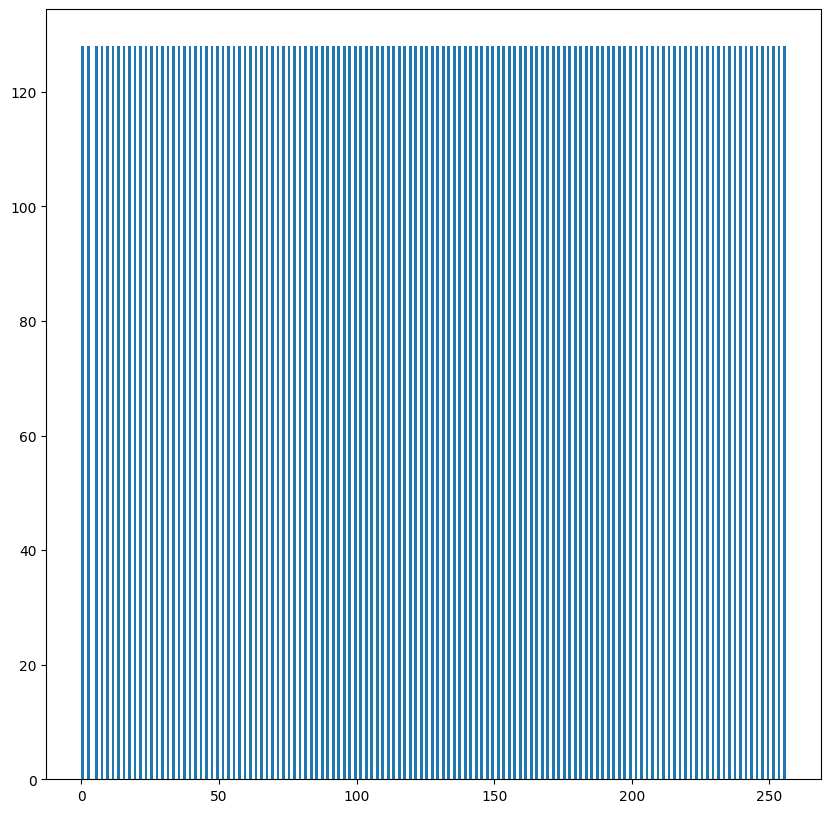

In [20]:
plt.hist(img_shading.ravel(), 256,[0,256])
plt.show()

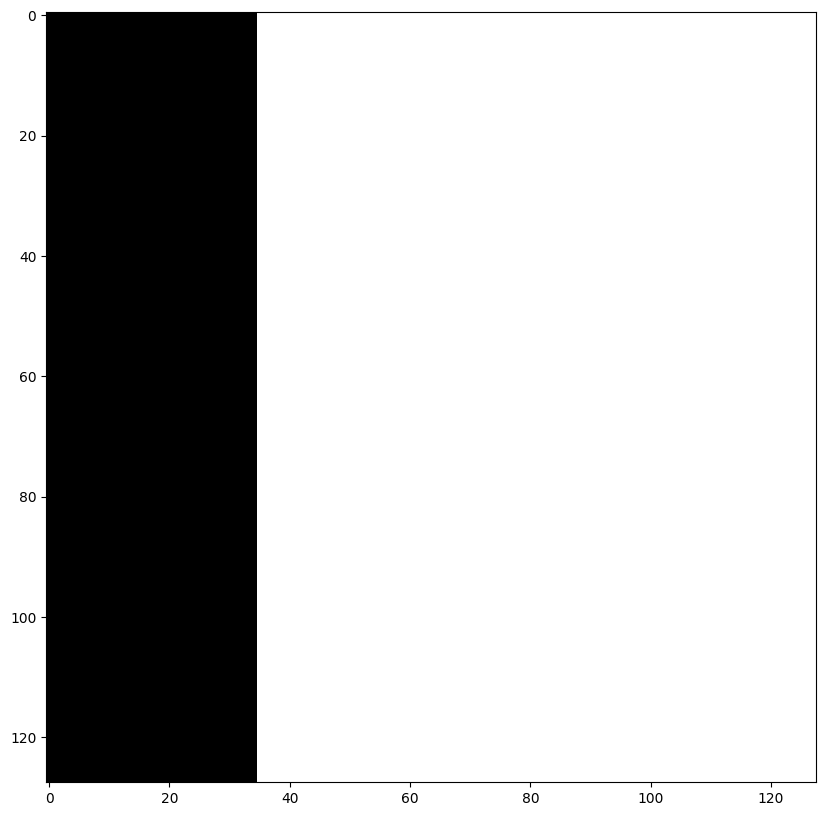

In [21]:
th_img_shading = threshold(70, 255, img_shading)
plt.imshow(th_img_shading)
plt.show()

## Exercise 2: Background Substraction

Background subtraction is an important preprocessing step of many algorithms, e.g. object detection. In the following exercises we will try to subtract the scene background using multiple images.

### 1.1 Extracting a moving object

* Load the "street1.gif" and the "street2.gif" images using ```imread()``` function. Visualize the results using ```plt.imshow()``` function.

Text(0.5, 1.0, 'Street 2')

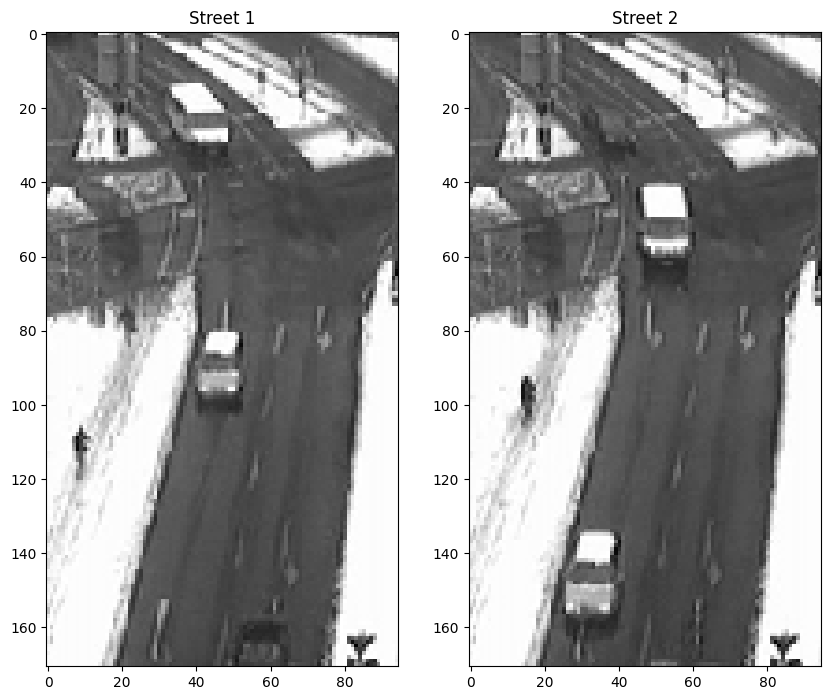

In [22]:
# Read images and assign them to image_1 and image_2 variables. 
image_1 = cv2.imread('images/street1.tiff',cv2.IMREAD_GRAYSCALE)  
image_2 = cv2.imread('images/street2.tiff',cv2.IMREAD_GRAYSCALE)
# Note: OpenCV does not read gif images, so we converted the original images to tiff. You can still read gif files with
# plt.imread()
 
# Display the results
plt.subplot(121)
plt.imshow(image_1)
plt.title('Street 1')

plt.subplot(122)
plt.imshow(image_2)
plt.title('Street 2')
 

* Transform the 8-bit images into float images. You can check the type of a variable using ```type()``` function (You need to check the type of variable holding a pixel value ```type(image_1[0,0])```. If you use ```type(image_1)``` it will tell you the type of the variable that hold the image instead of the type of the variable that holds the pixel values). To perform the type casting you can use ```np.float32()``` function. 

In [23]:
print('Type of the variables holding pixel values')
print(' Before casting: ' + str(type(image_1[0,0])))

image_1 = np.float32(image_1)
image_2 = np.float32(image_2)

print(' After casting: ' + str(type(image_1[0,0])))

# We can also use dtype as well to check the type of the elements in the array
print(' After casting: ' + str(image_1.dtype))

 

Type of the variables holding pixel values
 Before casting: <class 'numpy.uint8'>
 After casting: <class 'numpy.float32'>
 After casting: float32


* Subtract the second image from the first one using basic matrix arithmetic operations. Visualize the results. Why was it important to do the casting before subtracting the images. 

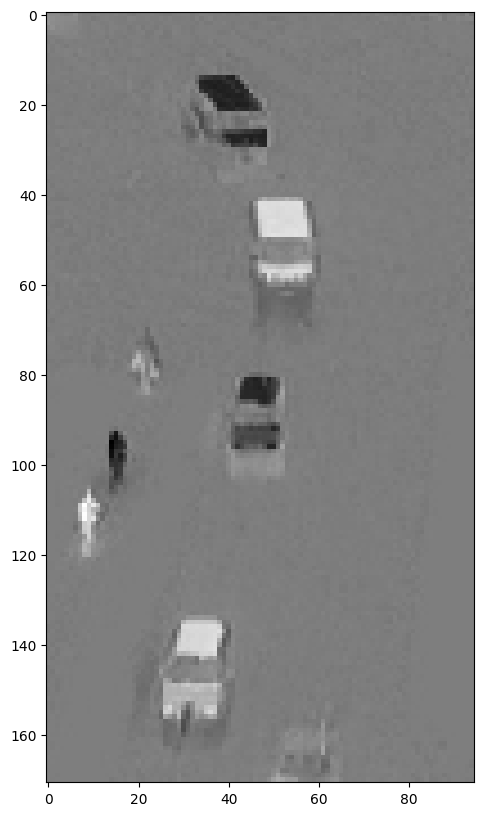

In [24]:
# Subtract image 2 from image 1
image_diff = image_2 - image_1
 
# Normalizing the result is ptional: 
# image_diff = ((image_diff-np.min(image_diff))/(np.max(image_diff)-np.min(image_diff)))

# The pixel values range from -190 to +196. plt.imshow rescales the values and displays it accurately.
plt.imshow(image_diff)  

### 1.2 Building a background model
For this exercise, you are given a sequence of images that contains pedestrians and we wish to segment with a background subtraction algorithm.

* Load and create a stack of images from the images inside ```images/sequence1```. Build a "background model" by averaging out the set of given images seperately for each color channel. Detect pedestrians
 subtracting the background model from the original images and applying the right threshold. Before the subtraction convert the images into grayscale. 

Text(0.5, 1.0, 'Background model')

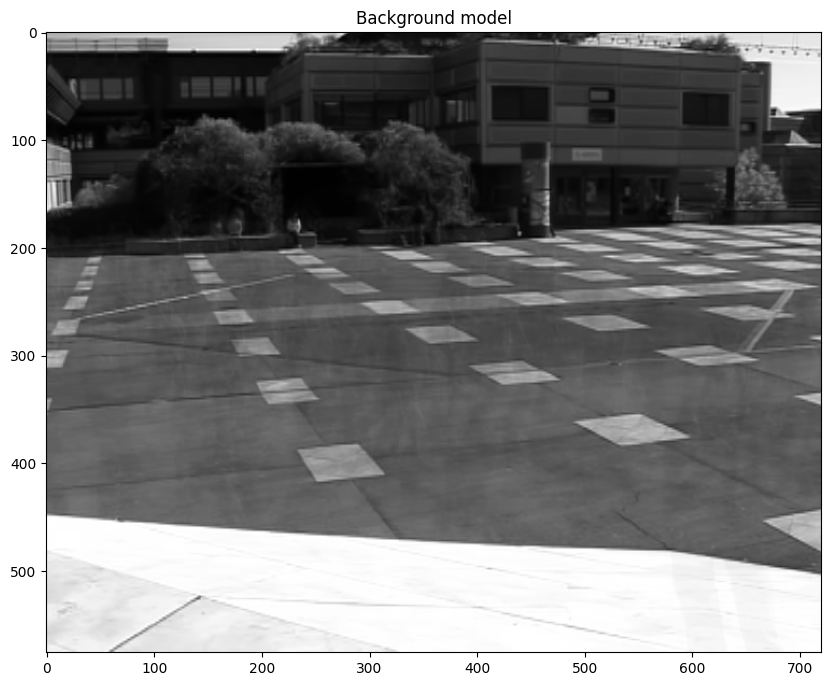

In [25]:
sq_of_images = listdir('images/sequence1/')  
sq_of_images = [img for img in sq_of_images if img.endswith(".jpg")]

stack = cv2.imread('images/sequence1/' + sq_of_images[0],cv2.IMREAD_GRAYSCALE)[None] 
for file in sq_of_images[1:]:
    img_i =  cv2.imread('images/sequence1/' + file,cv2.IMREAD_GRAYSCALE)[None] 
    stack = np.concatenate((stack,img_i),axis=0)
 
mean_image = np.uint8(np.mean(stack, axis = 0))
plt.imshow(mean_image) 
plt.title('Background model')

In [28]:
stack.shape

(30, 576, 720)

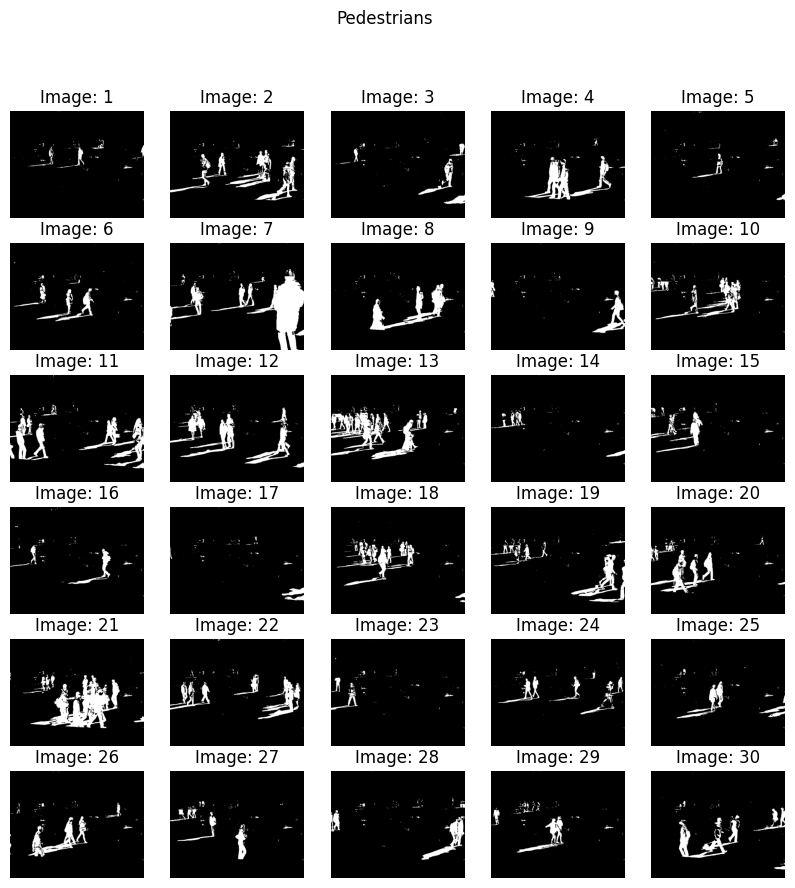

In [26]:
# Threshold being used
T = 30

# It's important to convert the stack and the mean image to float because we are performing 
# a substraction inside the loop
mean_image = np.float32(mean_image)
stack = np.float32(stack)

plt.figure(2)
plt.suptitle('Pedestrians')
for i in range(len(stack)):
    # Performing the thresholding operation
    diff_image = np.abs(mean_image - stack[i])
    foreground =  diff_image > T
    
    plt.subplot(6,5,i+1)
    plt.imshow(foreground)
    plt.axis('off')
    plt.title('Image: ' + str(i+1)) 

* Create a more sophisticated background model, where each pixel can be modeled with a Gaussian distribution. We can classify a pixel as background if its current intensity ($I_t$) lies within some confidence interval of its distribution’s mean ($\mu(t)$):


\begin{align}
\frac{\mid{(I_t - \mu_t)}\mid}{\sigma_t} > T \rightarrow Foreground 
\newline
\frac{\mid{(I_t - \mu_t)}\mid}{\sigma_t} < T \rightarrow Background 
\end{align}

$\sigma_t$ is the standard deviation of the pixel $t$ in the background model. $T$ is the threshold.

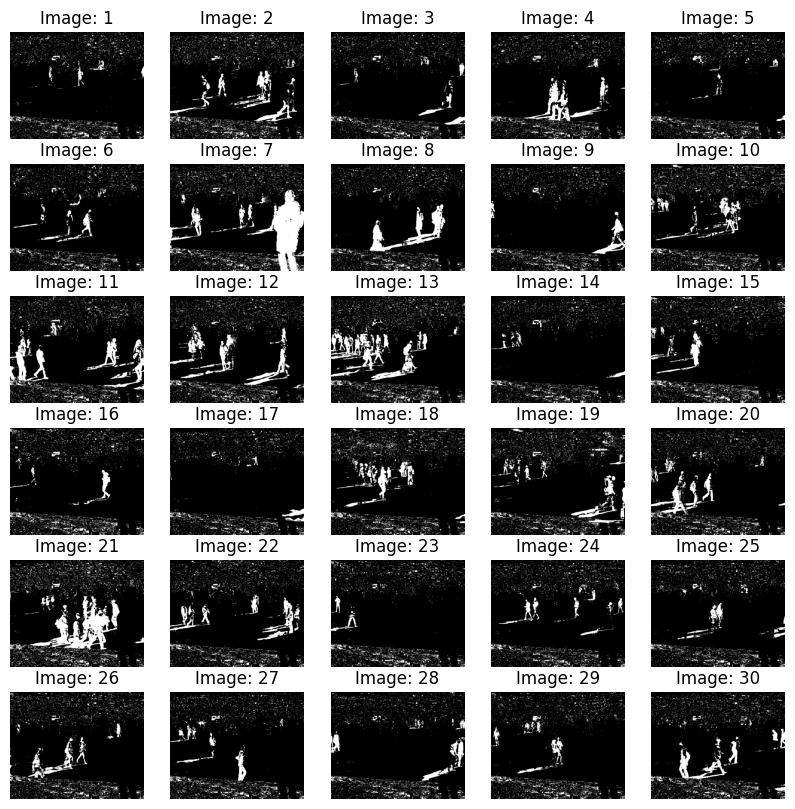

In [27]:
# Computes the standard deviation of the stack of images. 
# Since there are several pixels with zero standard deviation, we replace them 
# with a small value to avoid neumerical instability during division operation.
std =  np.std(stack, axis =0) 
std[std==0] = 10**-45

# Threshold. T = 2 means we consider any pixel that is more than 2*std away from the mean as
# a foreground pixel. 
T = 2
 
for i in range(len(stack)):
    foreground = (np.abs(stack[i]-mean_image)/std) > T
    plt.subplot(6,5,i+1)
    plt.imshow(foreground)
    plt.axis('off')
    plt.title('Image: ' + str(i+1)) 

What difference do you notice between the two approaches? How does changing
the threshold affect them?

In [24]:
# Comparison between method 1 and 2
# Visual inspection reveals that the first method performs better when compared with the second method. 
# There is more noise especially in the top half of the thresholded images. 
# The reason for this is that in the second model we assume background pixel values belong to a Gaussian distribution.
# But in-reality, they do not, especially in the top half of the images. As a result, more background pixels appear as 
# foreground pixels in the second method. 

# Effect of the threshold
# In both methods, when we increase the threshold, only the pixels that deviate most from the mean model get 
# classified as foreground pixels. As a result, the higher the threshold, the lower the number of foreground pixels. 


## Exercise 3: Connected Components

Segmentation can be also done for colour images. It is also often a first step for the further analysis e.g. measuring properties of the object. Here our goal is to count the number of apples in the picture below.



* Read and display"apples.jpg" image.

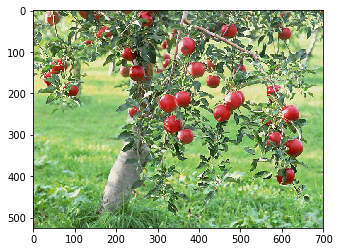

In [25]:
img_apples = cv2.imread("images/apples.jpg")
#Note: OpenCV reads color images in order of BGR (blue, green, red channels) but pyplot visualizes them as RGB. 
#For the visualization purposes we will invert the order of channels
b,g,r = cv2.split(img_apples)       # get b,g,r
img_apples = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(img_apples)

* Check the size of the image. Compared to the previous images it should have an additional dimension corresponding to three colour channels: red, green and blue. Visualize those 3 channels separately.

Text(0.5,1,'Blue channel')

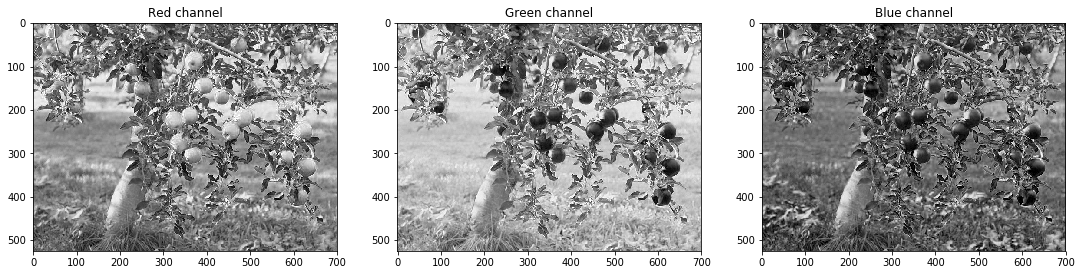

In [26]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
axes[0].imshow(img_apples[:,:,0])
axes[0].set_title("Red channel")
axes[1].imshow(img_apples[:,:,1])
axes[1].set_title("Green channel")
axes[2].imshow(img_apples[:,:,2])
axes[2].set_title("Blue channel")

* Try to obtain a binary image such that binary image == 255 for pixels representing apples and 0 otherwise. Which channel(s) would you use for that?

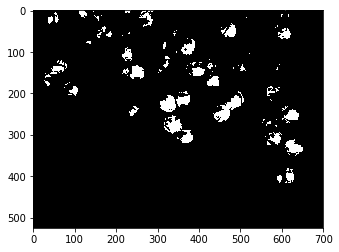

In [28]:
bin_img = np.zeros(img_apples.shape[0:2])
#I used for thresholding red and green channels, because the apples contrasted the most for them
bin_img[(img_apples[:,:,1]<80) & (img_apples[:,:,0]>100)] = 255
plt.imshow(bin_img)

* Count the number of connected components in your binary image (here corresponding to apples). For this, you can use function ```measure.label()``` The output is an array of the same size as input with each pixel assigned to a different components (ID).

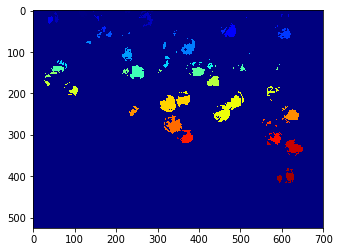

In [29]:
labels = measure.label(bin_img)
plt.imshow(labels,cmap="jet")

* Simple thresholding sometimes leads to detecting also noise in the background that is detected as seperate connected components. Try to suppress the noise by removing all connected components smaller than a user-defined threshold.

In [30]:
def remove_noise(cc_ids,threshold):

    label_img_new = np.copy(cc_ids)
    num_comp = np.amax(cc_ids)
    
    for i in range(num_comp+1):
        num_pixels = sum(sum(cc_ids==i))
        if num_pixels < threshold:
            label_img_new[cc_ids==i] = 0
    
    return label_img_new

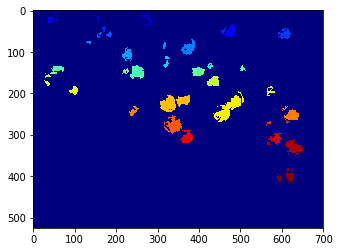

In [31]:
labels_new = remove_noise(labels,50)
plt.imshow(labels_new,cmap="jet")
#Depending on the threshold the number of false detections (small noise in the background) will decrease. 
#However we have to be careful not to suppress some valid detections